## WEB SCRAPING AND ANALYSIS OF NIGERIA'S COVID 19 DATA 
Author: Samuel Taiwo

Date: 06-07-2021

In [3]:
#Import all necessary libraries
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Request for the url
url = "https://covid19.ncdc.gov.ng/"
res = urllib.request.urlopen(url)

In [5]:
#read the data from url as a string
html = res.read()

In [6]:
#parse with the beautiful soup library
bs = BeautifulSoup(html,"html.parser")

In [7]:
#find all tables
tables = bs.find_all("table")

In [8]:
#Print out all the tables found in the URL in HTML format.
tables


[<table id="custom1">
 <thead>
 <tr>
 <th>States Affected</th>
 <th>No. of Cases (Lab Confirmed)</th>
 <th>No. of Cases (on admission)</th>
 <th>No. Discharged</th>
 <th>No. of Deaths</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>
                                                 Lagos
                                             </td>
 <td>59,833
                                             </td>
 <td>862
                                             </td>
 <td>58,515
                                             </td>
 <td>456
                                             </td>
 </tr>
 <tr>
 <td>
                                                 FCT
                                             </td>
 <td>19,902
                                             </td>
 <td>183
                                             </td>
 <td>19,552
                                             </td>
 <td>167
                                             </td>
 </tr>
 <tr>
 <td>
                                 

In [9]:
#lets see what is in the first element
tables[0]

<table id="custom1">
<thead>
<tr>
<th>States Affected</th>
<th>No. of Cases (Lab Confirmed)</th>
<th>No. of Cases (on admission)</th>
<th>No. Discharged</th>
<th>No. of Deaths</th>
</tr>
</thead>
<tbody>
<tr>
<td>
                                                Lagos
                                            </td>
<td>59,833
                                            </td>
<td>862
                                            </td>
<td>58,515
                                            </td>
<td>456
                                            </td>
</tr>
<tr>
<td>
                                                FCT
                                            </td>
<td>19,902
                                            </td>
<td>183
                                            </td>
<td>19,552
                                            </td>
<td>167
                                            </td>
</tr>
<tr>
<td>
                                                Kaduna
                 

In [10]:
#get all the rows 
rows = bs.find_all("tr")

In [11]:
#Print out only the contents of the first row
rows[1]

<tr>
<td>
                                                Lagos
                                            </td>
<td>59,833
                                            </td>
<td>862
                                            </td>
<td>58,515
                                            </td>
<td>456
                                            </td>
</tr>

Recall that the first row of probably every table you'll encounter on the web are column names, meaning we need to handle the first column differently. First of all, we want to collect these names and save them for later.

So we will find_all instances of th in the first row. From there, we will get the text from the cell using .text, which is a signal to the HTML element that we want the text within the cell. After that, we'll use the string methods strip and replace to clean up the text a little so they are proper column names. Then we'll add them to a list called columns.

In [12]:
#Create an empty list of columns
columns_names = []
#Find all instances of "th" in the first row
header_cells = rows[0].find_all("th")

In [13]:
#Print the header tags
header_cells

[<th>States Affected</th>,
 <th>No. of Cases (Lab Confirmed)</th>,
 <th>No. of Cases (on admission)</th>,
 <th>No. Discharged</th>,
 <th>No. of Deaths</th>]

In [14]:
#Extract the text from the header tags and replace new lines with empty spaces.
for cell in header_cells:
    header = cell.text
    header = header.strip()
    header = header.replace("\n"," ")
    columns_names.append(header)
    print(header)

States Affected
No. of Cases (Lab Confirmed)
No. of Cases (on admission)
No. Discharged
No. of Deaths


Now that we have the titles, we can collect the actual data from the file. We'll loop through all the rows, starting at the second one. Then we'll loop through all the cells in the row. To make this stuff all easy to find into pandas, we'll store the data from each row in a tuple. Remember tuples?

Adding to a tuple is a little weird. You can only add a tuple to another tuple. So we'll begin by creating an empty tuple, then add to it by adding another tuple with one element in it.

In [15]:
data = []

for row in rows[1:]:
    cells = row.find_all("td")
    
    ## create an empty tuple
    dt = ()
    for cell in cells:
        dp = cell.text

        dp = dp.strip()
        dp = dp.replace("\n", " ")
        
        ## add to tuple
        dt = dt + (dp,)
    data.append(dt)
    

In [16]:
#Print out the Scraped out data.
data

[('Lagos', '59,833', '862', '58,515', '456'),
 ('FCT', '19,902', '183', '19,552', '167'),
 ('Kaduna', '9,123', '18', '9,040', '65'),
 ('Plateau', '9,067', '4', '9,006', '57'),
 ('Rivers', '7,335', '26', '7,208', '101'),
 ('Oyo', '6,872', '12', '6,734', '126'),
 ('Edo', '4,910', '0', '4,725', '185'),
 ('Ogun', '4,694', '10', '4,633', '51'),
 ('Kano', '4,005', '6', '3,889', '110'),
 ('Ondo', '3,483', '27', '3,391', '65'),
 ('Kwara', '3,144', '21', '3,068', '55'),
 ('Delta', '2,650', '22', '2,556', '72'),
 ('Osun', '2,578', '6', '2,520', '52'),
 ('Enugu', '2,464', '0', '2,435', '29'),
 ('Nasarawa', '2,384', '0', '2,345', '39'),
 ('Katsina', '2,110', '21', '2,055', '34'),
 ('Gombe', '2,098', '18', '2,036', '44'),
 ('Ebonyi', '2,039', '5', '2,002', '32'),
 ('Akwa Ibom', '1,931', '1', '1,912', '18'),
 ('Anambra', '1,909', '64', '1,826', '19'),
 ('Abia', '1,693', '-2', '1,673', '22'),
 ('Imo', '1,661', '0', '1,624', '37'),
 ('Bauchi', '1,549', '0', '1,532', '17'),
 ('Benue', '1,366', '15', '1

In [17]:
#Store the dataset in a tabular format using pandas
df = pd.DataFrame(data,columns=columns_names)

In [57]:
#Display the first 5 rows of the dataset
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,59833,862,58515,456
1,FCT,19902,183,19552,167
2,Kaduna,9123,18,9040,65
3,Plateau,9067,4,9006,57
4,Rivers,7335,26,7208,101


**This dataframe represent Nigeria's COVID-19 data as of 06-07-2021**

In [19]:
#Print out the columns of the new table.
df.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

In [20]:
df.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)    object
No. of Cases (on admission)     object
No. Discharged                  object
No. of Deaths                   object
dtype: object

In [21]:
#write a function to convert the string/object data to integers
def convert_strings(string):
    num = string.split(",")
    num = "".join(num)
    num = int(num)
    
    return num
    

In [22]:
#Apply the function to each column made up of numbers with commas.
df['No. of Cases (Lab Confirmed)'] = df['No. of Cases (Lab Confirmed)'].apply(convert_strings)
df['No. of Cases (on admission)'] = df['No. of Cases (on admission)'].apply(convert_strings)
df['No. Discharged'] = df['No. Discharged'].apply(convert_strings)
df['No. of Deaths'] = df['No. of Deaths'].apply(convert_strings)

In [23]:
#Cross check the data types of columns with numerical values once again.
df.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
dtype: object

In [24]:
#Display the first 5 rows of the dataset
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,59833,862,58515,456
1,FCT,19902,183,19552,167
2,Kaduna,9123,18,9040,65
3,Plateau,9067,4,9006,57
4,Rivers,7335,26,7208,101


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [26]:
df.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37.000000,37.000000,37.000000,37.000000
mean,4538.081081,37.486486,4443.243243,57.351351
std,10039.612073,142.841136,9827.154461,79.498503
min,5.000000,-2.000000,3.000000,2.000000
25%,935.000000,0.000000,913.000000,18.000000
50%,1931.000000,5.000000,1912.000000,32.000000
75%,3483.000000,18.000000,3391.000000,57.000000
max,59833.000000,862.000000,58515.000000,456.000000


In [27]:
print("The total number of Cases (Lab Confirmed) in Nigeria is:", df['No. of Cases (Lab Confirmed)'].sum())
print("The total No. of Cases (on admission) in Nigeria is:", df['No. of Cases (on admission)'].sum())
print("The total No. Discharged is in Nigeria :", df['No. Discharged'].sum())
print("The total No. of Deaths is in Nigeria :", df['No. of Deaths'].sum())

The total number of Cases (Lab Confirmed) in Nigeria is: 167909
The total No. of Cases (on admission) in Nigeria is: 1387
The total No. Discharged is in Nigeria : 164400
The total No. of Deaths is in Nigeria : 2122


# Number on confirmed cases

In [64]:
px.bar(df,x = 'States Affected',y = 'No. of Cases (Lab Confirmed)')

**scroll over each bar for more information**

Lagos state has the highest number of Confirmed Cases and Kogi state has the lowest number of Confirmed Cases

# Number of cases on Admisssion

In [59]:
px.bar(df,x = 'States Affected',y = 'No. of Cases (on admission)')

**scroll over each bar for more information**

Lagos state has the highest number of Admitted Cases.

# Number of Discharged cases

In [61]:
px.bar(df,x = 'States Affected',y = 'No. Discharged')

**scroll over each bar for more information**

Lagos state has the highest number of Discharged Cases and Kogi state has the lowest number of Discharged Cases

# Number of Deaths

In [63]:
px.bar(df,x = 'States Affected',y = 'No. of Deaths')

**scroll over each bar for more information**

Lagos state has the highest number of Death Cases and Kogi state has the lowest number of Death Cases

## Distribution of Number of cases(Lab Confirmed)

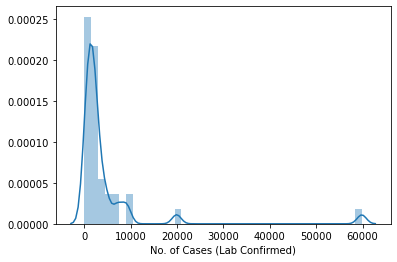

In [42]:
sns.distplot(df["No. of Cases (Lab Confirmed)"]);

From the above distribution plots, we discover that the number of Confirmed cases in each state is majorly between 0 and 100 000.

## Distribution of Number of Admitted Cases.

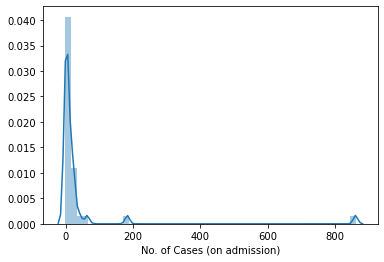

In [43]:
sns.distplot(df["No. of Cases (on admission)"]);

From the above distribution plots, we discover that the number of Admitted cases in each state is majorly between 0 and 200.

## Distribution of Number of Discharged

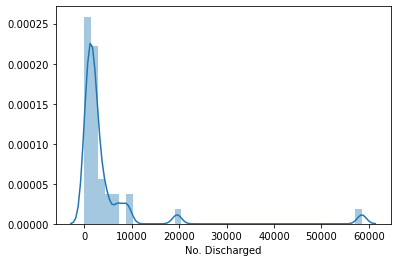

In [35]:
sns.distplot(df["No. Discharged"]);

### Scatter plot of Number of Cases(Lab Confirmed) against the Number of Deaths for with each point representing a state.

In [55]:
px.scatter(x = "No. of Cases (Lab Confirmed)", y = "No. of Deaths", data_frame = df,
          color = "States Affected",size = "No. of Cases (Lab Confirmed)")

**scroll over each point for more information on each state**

The above scatterplot represents the number of Deaths against the number of Confirmed cases. We can see a bit of correlation in the visualization, With Lagos leading in the number of Confirmed cases with a figure of 59,833 and number of deaths at 456. Majority of the states have number of confirmed cases below 10,000 and number of deaths below 200.

## Scatter plot of Number of Cases(Lab Confirmed) against the Number of Discharged cases  with each point representing a state.


In [54]:

px.scatter(x = "No. of Cases (Lab Confirmed)", y = "No. Discharged", data_frame = df,
          color = "States Affected",size= "No. of Cases (Lab Confirmed)")

**scroll over each point for more information on each state**

Examining the above scatterplot, we can see that there is a very high correlation between the Number of Discharged cases and the Number of Lab Confirmed cases.  This implies that as the number of cases rise the number of discharged cases also rises.The size of each point represents the size in numbers of the Lab Confirmed cases. Lagos State has the largest point and therefore has the highest number of Confirmed Cases and also death cases.

In [41]:
df.corr()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
No. of Cases (Lab Confirmed),1.000000,0.968017,0.999992,0.934154
No. of Cases (on admission),0.968017,1.000000,0.967286,0.880495
No. Discharged,0.999992,0.967286,1.000000,0.933462
No. of Deaths,0.934154,0.880495,0.933462,1.000000


Looking at the correlation of all numerical columns in the dataframe, we can ascertain the high correlation between Number of cases(Lab confirmed) and the Number of Discharged.

### Bar plot for Confirmed cases, Admitted cases, Discharged cases and Death cases for the first 10 states in the dataframe.

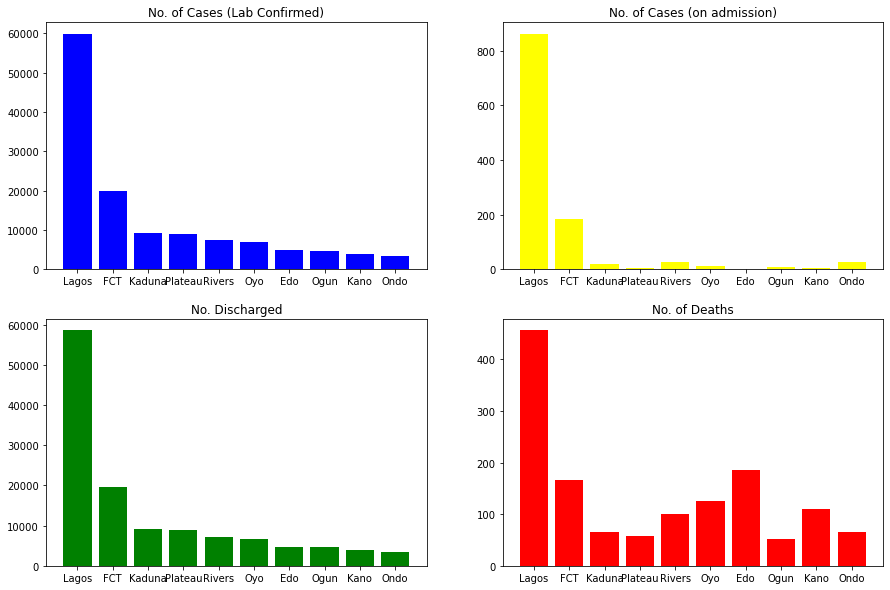

In [51]:

plt.figure(figsize=(15,10))

values = (range(1,5),["Confirmed","On Admission","Discharged","Deaths"],['blue','yellow','green','red'])
central_circle = plt.Circle((0, 0), 0.5, color='white')
for index, item, color in zip(range(1,5),["No. of Cases (Lab Confirmed)","No. of Cases (on admission)",
                                          "No. Discharged","No. of Deaths"],['blue','yellow','green','red']):
    plt.subplot(2,2,index),
    plt.title(item),
    plt.bar(df["States Affected"][:10],df[item][:10], color = color)
    


In [52]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,59833,862,58515,456
1,FCT,19902,183,19552,167
2,Kaduna,9123,18,9040,65
3,Plateau,9067,4,9006,57
4,Rivers,7335,26,7208,101


### Pie Chart for Confirmed cases, Admitted cases, Discharged cases and Death cases for the first 10 states in the dataframe.

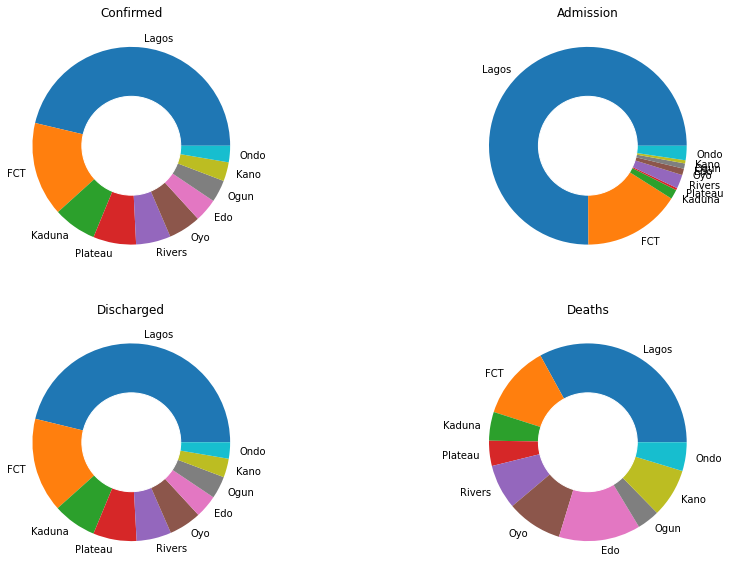

In [86]:
plt.figure(figsize=(15,10))
plt.title("Main Title")
values = (range(1,5),["Confirmed","On Admission","Discharged","Deaths"],['blue','yellow','green','red'])

#Subplot pie chart for Confirmed Cases for the first 10 States in the dataframe.
plt.subplot(2,2,1),
plt.pie(labels = df["States Affected"][:10],x = df["No. of Cases (Lab Confirmed)"][:10]);
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.title("Confirmed"),

    
#Subplot pie chart for Admitted Cases for the first 10 States in the dataframe.
plt.subplot(2,2,2),
plt.title("Admission"),
plt.pie(labels = df["States Affected"][:10],x = df["No. of Cases (on admission)"][:10]);
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)

#Subplot pie chart for Discharged Cases for the first 10 States in the dataframe.
plt.subplot(2,2,3),
plt.title("Discharged"),
plt.pie(labels = df["States Affected"][:10],x = df["No. Discharged"][:10]);
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle);

#Subplot pie chart for death for the first 10 States in the dataframe Cases.
plt.subplot(2,2,4),
plt.title("Deaths"),
plt.pie(labels = df["States Affected"][:10],x = df["No. of Deaths"][:10]);
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle);


    #for covid 19 data

These pie chart representations give a clearer understanding of the states leading in Confirmed cases, discharged cases, admitted cases and Death related cases. We can clearly see that Lagos is leading in all cases, followed by Abuja.

## Conclusion & Recommendation

COVID 19 is still very much present in Nigeria. There has been a decline in the number of cases worldwide but it is good and neccesary for us to keep up with how well we have tackled the pandemic by critically considering and analysing the data generated daily from the COVID-19 virus. This will help us to know which areas/locations to focus on and also determine which location we should deploy more health workers and vaccines. Studying COVID-19 also helps us know which locations to reduce the level of lockdown. This is what we have tried to achieve in this notebook by first extracting the COVID-19 data for Nigerian states from NCDC web, Cleaning the data and performing Exploratory Data visualization to understand the data. Further work can be done in this regard, by building a system that scraps COVID-19 data and automatically build a dashboard of data visualization for people to easily understand and capture insights from the data.